## Building Network Models
# UB Species-collectors Network
### Connected Components

---

In [1]:
# Setting paths
import sys,os
import pathlib
sys.path.insert(0,os.path.expanduser('~/caryocar'))
sys.path.insert(0,os.path.abspath('..'))

In [2]:
# Building the networks from data
from setupmodels import scn
from setupmodels import occs
from setupmodels import ni

In [3]:
# Importing libraries for analysis
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

---

First, let's get the connected components, ordered by number of nodes. There are a total of $351$ connected components.

In [4]:
# Connected components ordered by number of nodes
connected_components = [ cc for cc in sorted(scn.connectedComponentsSubgraphs(), key=lambda x: x.number_of_nodes(), reverse=True) ]

In [5]:
num_nodes = lambda comp: comp.number_of_nodes()
num_cols = lambda comp: len(comp.listCollectorsNodes())
num_spp = lambda comp: len(comp.listSpeciesNodes())
num_records = lambda comp: sum( count for sp,count in comp.listSpeciesNodes(data='count'))
for l in [ (i+1, num_records(comp), num_nodes(comp), num_cols(comp), num_spp(comp)) for i, comp in enumerate(connected_components) ]:
    print("Component {}: {} records, {} nodes ({} collectors + {} species)".format(*l))

Component 1: 146807 records, 21091 nodes (6334 collectors + 14757 species)
Component 2: 5013 records, 144 nodes (3 collectors + 141 species)
Component 3: 5 records, 11 nodes (6 collectors + 5 species)
Component 4: 7 records, 9 nodes (2 collectors + 7 species)
Component 5: 5 records, 8 nodes (3 collectors + 5 species)
Component 6: 8 records, 8 nodes (1 collectors + 7 species)
Component 7: 6 records, 8 nodes (3 collectors + 5 species)
Component 8: 8 records, 8 nodes (4 collectors + 4 species)
Component 9: 7 records, 8 nodes (1 collectors + 7 species)
Component 10: 5 records, 7 nodes (3 collectors + 4 species)
Component 11: 13 records, 7 nodes (2 collectors + 5 species)
Component 12: 5 records, 6 nodes (1 collectors + 5 species)
Component 13: 5 records, 6 nodes (1 collectors + 5 species)
Component 14: 5 records, 6 nodes (3 collectors + 3 species)
Component 15: 4 records, 6 nodes (4 collectors + 2 species)
Component 16: 5 records, 6 nodes (1 collectors + 5 species)
Component 17: 4 records,

### The Giant component ($c_1$)

The giant component has $21091$ nodes, being $6334$ collectors and $14747$ species.

* Most records are from Brazil:

In [6]:
c1 = connected_components[0]

In [7]:
occs_c1 = occs.loc[ set( ix for col in c1.listCollectorsNodes() for ix in ni[col] ) ]

In [8]:
occs_c1['countryCode'].value_counts(normalize=True)[:10]

BR    0.951812
US    0.007904
AQ    0.007010
ID    0.003495
AU    0.002867
ZA    0.002580
MY    0.002505
FI    0.002252
PG    0.001966
SE    0.001645
Name: countryCode, dtype: float64

* Within Brazil, $53\%$ of records are from DF and GO:

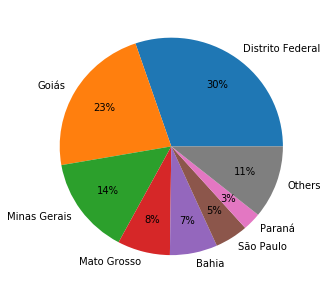

In [9]:
display=7
top5=occs_c1[occs_c1['countryCode']=='BR']['stateProvince'].value_counts(normalize=True)[:display]
others=pd.Series( occs_c1[occs_c1['countryCode']=='BR']['stateProvince'].value_counts(normalize=True)[display:].sum(), index=['Others'] )
pd.concat([top5,others]).plot(kind='pie',figsize=(5,5),label='',autopct='%1.0f%%',pctdistance=0.7)

* Almost $34\%$ of species in $c_1$ (a total of $4983$) were recorded only once (singletons). Similarly, around $36\%$ of collectors (a total of $2292$) have participated on a single record.

In [10]:
# Singleton species
num_singleton_spp_c1 = sum( 1 for sp, cnt in c1.listSpeciesNodes(data='count') if cnt==1 )
num_spp_c1 = len(c1.listSpeciesNodes())
print('Num:',num_singleton_spp_c1)
print("Pct: {:.2%}".format(num_singleton_spp_c1/num_spp_c1))

Num: 4983
Pct: 33.77%


In [11]:
# Singleton collectors
num_singleton_cols_c1 = sum( 1 for col, cnt in c1.listCollectorsNodes(data='count') if cnt==1 )
num_cols_c1 = len(c1.listCollectorsNodes())
print('Num:',num_singleton_cols_c1)
print("Pct: {:.2%}".format(num_singleton_cols_c1/num_cols_c1))

Num: 2292
Pct: 36.19%


* Taxonomic composition: $88\%$ are tracheophytes; $73\%$ are from class Magnoliopsida.

In [12]:
occs_c1['phylum'].value_counts(normalize=True)[:5]

Tracheophyta       0.880614
Bryophyta          0.080462
Ochrophyta         0.028131
Marchantiophyta    0.008256
Ascomycota         0.002395
Name: phylum, dtype: float64

In [13]:
occs_c1['class'].value_counts(normalize=True)[:5]

Magnoliopsida        0.732394
Liliopsida           0.122320
Bryopsida            0.079289
Bacillariophyceae    0.028131
Polypodiopsida       0.023259
Name: class, dtype: float64

### The second biggest component ($c_2$)

This component has a total of $144$ nodes, being $3$ collectors and $141$ species.

In [14]:
c2 = connected_components[1]

In [15]:
occs_c2 = occs.loc[ set( ix for col in c2.listCollectorsNodes() for ix in ni[col]) ]

* Only $2$ of the $141$ species have been recorded once (singleton). None of the $3$ collectors have participated on a single record.

In [16]:
# Singleton species
num_singleton_spp_c2 = sum( 1 for sp, cnt in c2.listSpeciesNodes(data='count') if cnt==1 )
num_spp_c2 = len(c2.listSpeciesNodes())
print('Num:',num_singleton_spp_c2)
print("Pct: {:.2%}".format(num_singleton_spp_c2/num_spp_c2))

Num: 2
Pct: 1.42%


In [17]:
# Singleton collectors
num_singleton_cols_c2 = sum( 1 for col, cnt in c2.listCollectorsNodes(data='count') if cnt==1 )
num_cols_c2 = len(c2.listCollectorsNodes())
print('Num:',num_singleton_cols_c2)
#print("Pct: {:.2%}".format(num_singleton_cols_c1/num_cols_c2))

Num: 0


* Taxonomic composition

In [18]:
occs_c2['phylum'].value_counts(normalize=True)

Charophyta       0.690405
Chlorophyta      0.226012
Cyanobacteria    0.042689
Euglenozoa       0.026731
Myzozoa          0.014163
Name: phylum, dtype: float64

In [19]:
occs_c2['class'].value_counts(normalize=True)

Zygnematophyceae    0.690405
Chlorophyceae       0.158189
Trebouxiophyceae    0.067824
Cyanophyceae        0.042689
Euglenoidea         0.026731
Dinophyceae         0.014163
Name: class, dtype: float64

* Ana Lúcia Tostes Leite (an important Federal District algae collector in UB) is in $c_2$, with a total of $2757$ records of $87$ distinct species. All are Charophyte green algae.

In [20]:
print(''.join([ "{}: num_recs:{}; k:{}\n".format(col,cnt,nx.degree(c2,col)) for col,cnt in c2.listCollectorsNodes(data='count') ]))

castelobranco,cw: num_recs:2256; k:57
grando,jv: num_recs:2256; k:57
leite,alta: num_recs:2757; k:87



In [42]:
occs_c2.loc[ni['leite,alta']]['phylum'].value_counts()

Charophyta    2757
Name: phylum, dtype: int64

In [97]:
occs_c2.loc[ni['leite,alta']]['family'].value_counts()

Desmidiaceae     2688
Closteriaceae      69
Name: family, dtype: int64

* All occurrences are from the Federal District:

In [21]:
occs_c2['stateProvince'].value_counts()

Distrito Federal    5013
Name: stateProvince, dtype: int64

* Aggregate by family

In [65]:
grp = dict( (family,set(spp)) for family, spp in occs_c2[['species','family']].groupby('family')['species'])

In [67]:
c2_agg_family = c2.taxonomicAggregation(grp)

In [93]:
nx.set_edge_attributes(c2_agg_family, dict([ ((u,v),int(ct)) for u,v,ct in c2_agg_family.edges(data='count') ]), name='count')

In [94]:
c2_agg_family

In [95]:
nx.write_gexf(c2_agg_family,'./graphs_scn_connectedComponents/c2_agg_family.gexf')

In [96]:
!pwd

/home/pedro/tese_lncc/notebooks/chapter4


### Other connected components ($c_3$, $c_4$, ..., $c_{351}$)

In [22]:
other_comps = connected_components[2:]

In [23]:
occs_otherComps = occs.loc[ set( ix for comp in other_comps for col in comp.listCollectorsNodes() for ix in ni[col] ) ]

The rest of the components include a total of $431$ distinct collectors, $446$ distinct species. Almost $1$ species per collector.

In [24]:
sum( 1 for c in other_comps for col in c.listCollectorsNodes() )

431

In [25]:
sum( 1 for c in other_comps for sp in c.listSpeciesNodes() )

446

* Taxonomic composition

In [26]:
occs_otherComps['phylum'].value_counts(normalize=True)

Tracheophyta        0.825397
Bryophyta           0.156746
Marchantiophyta     0.013889
Anthocerotophyta    0.001984
Ascomycota          0.001984
Name: phylum, dtype: float64

In [27]:
occs_otherComps['class'].value_counts(normalize=True)

Magnoliopsida        0.545635
Liliopsida           0.196429
Bryopsida            0.150794
Polypodiopsida       0.067460
Jungermanniopsida    0.011905
Psilotopsida         0.005952
Sphagnopsida         0.005952
Equisetopsida        0.003968
Lycopodiopsida       0.003968
Eurotiomycetes       0.001984
Anthocerotopsida     0.001984
Marchantiopsida      0.001984
Cycadopsida          0.001984
Name: class, dtype: float64

* Most records are from outside Brazil

In [28]:
occs_otherComps['countryCode'].value_counts(normalize=True)[:10]

US    0.238776
BR    0.210204
AU    0.091837
CO    0.034694
AR    0.026531
ZA    0.022449
MX    0.020408
PS    0.016327
ZZ    0.016327
SE    0.016327
Name: countryCode, dtype: float64

* Most records from Brazil are within the Southwest region

In [29]:
occs_otherComps[(occs_otherComps['countryCode']=='BR')]['stateProvince'].value_counts(normalize=True)

São Paulo              0.310680
Rio de Janeiro         0.135922
Minas Gerais           0.135922
Distrito Federal       0.077670
Bahia                  0.067961
Rio Grande do Sul      0.048544
Pará                   0.048544
Roraima                0.029126
Paraná                 0.029126
Amazonas               0.029126
Mato Grosso            0.019417
Rio Grande do Norte    0.019417
Mato Grosso do Sul     0.019417
Rondônia               0.009709
Ceará                  0.009709
Espírito Santo         0.009709
Name: stateProvince, dtype: float64

In [30]:
southeast = ['Minas Gerais','São Paulo','Rio de Janeiro','Espírito Santo']

In [31]:
# % Records in the Southwest region
in_southeast = occs_otherComps[(occs_otherComps['countryCode']=='BR')]['stateProvince'].isin(southeast)
in_southeast.mean()

0.59223300970873782

In [32]:
# % Records in SP from all those within the southwest region
occs_otherComps[(occs_otherComps['stateProvince']=='São Paulo')].shape[0] / sum(in_southeast)

0.52459016393442626

---